<a href="https://colab.research.google.com/github/PKpacheco/nn_assign5_rnn/blob/main/pk_comp3704_assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5: Stock Price Predictions
Group 8:
* Paola Katherine Pacheco
* Wai Ping Kwok
* Xueyao Wang

## Objective:
To build a time sequence model for predicting short term future stock prices from historical data.

##Data:
Historical stock price data on US-based stocks, last updated in 2017. The dataset is available at Huge Stock Market Dataset | Kaggle (https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs) and is provided by Boris Marjanovic. A list of stock ticker symbols is available at List of All Stock Ticker Symbols - Stock Analysis (https://stockanalysis.com/stocks/), to help identify the name of the stock from the txt file name.

##Problem Statement:
An investment company is interested in learning about the potential profit in frequent buy/sell stock transactions. You are tasked with developing a time sequence model to predict the price two days ahead based on recent prices. Choose four (or more) of the data files for training and a separate two for validation. Once the model is finalized, demonstrate how well your model makes predictions by using two other data files for testing.

# Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

from sklearn.preprocessing import MinMaxScaler

In [3]:
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

**a. Select four (or more) of the data files in stocks.zip to use as training data, two others for validation, and two others for testing.**

In [4]:
# # for Jerry
# # training data
# inp01 = pd.read_csv('/content/drive/MyDrive/COMP3704_NN/assignment_5/dis.us.txt', index_col='Date')
# inp02 = pd.read_csv('/content/drive/MyDrive/COMP3704_NN/assignment_5/f.us.txt', index_col='Date')
# inp03 = pd.read_csv('/content/drive/MyDrive/COMP3704_NN/assignment_5/intc.us.txt', index_col='Date')
# inp04 = pd.read_csv('/content/drive/MyDrive/COMP3704_NN/assignment_5/ko.us.txt', index_col='Date')
# inp05 = pd.read_csv('/content/drive/MyDrive/COMP3704_NN/assignment_5/mara.us.txt', index_col='Date')
# inp06 = pd.read_csv('/content/drive/MyDrive/COMP3704_NN/assignment_5/nvda.us.txt', index_col='Date')

# # validation data
# inp07 = pd.read_csv('/content/drive/MyDrive/COMP3704_NN/assignment_5/t.us.txt', index_col='Date')
# inp08 = pd.read_csv('/content/drive/MyDrive/COMP3704_NN/assignment_5/tsla.us.txt', index_col='Date')

# # testing data
# inp09 = pd.read_csv('/content/drive/MyDrive/COMP3704_NN/assignment_5/amzn.us.txt', index_col='Date')
# inp10 = pd.read_csv('/content/drive/MyDrive/COMP3704_NN/assignment_5/aapl.us.txt', index_col='Date')

In [5]:
# # for Jerry
# # training data
# inp01 = pd.read_csv('/content/drive/MyDrive/COMP3704_NN/assignment_5/dis.us.txt', index_col='Date')
# inp02 = pd.read_csv('/content/drive/MyDrive/COMP3704_NN/assignment_5/f.us.txt', index_col='Date')
# inp03 = pd.read_csv('/content/drive/MyDrive/COMP3704_NN/assignment_5/intc.us.txt', index_col='Date')
# inp04 = pd.read_csv('/content/drive/MyDrive/COMP3704_NN/assignment_5/ko.us.txt', index_col='Date')
# inp05 = pd.read_csv('/content/drive/MyDrive/COMP3704_NN/assignment_5/mara.us.txt', index_col='Date')
# inp06 = pd.read_csv('/content/drive/MyDrive/COMP3704_NN/assignment_5/nvda.us.txt', index_col='Date')

# # validation data
# inp07 = pd.read_csv('/content/drive/MyDrive/COMP3704_NN/assignment_5/t.us.txt', index_col='Date')
# inp08 = pd.read_csv('/content/drive/MyDrive/COMP3704_NN/assignment_5/tsla.us.txt', index_col='Date')

# # testing data
# inp09 = pd.read_csv('/content/drive/MyDrive/COMP3704_NN/assignment_5/amzn.us.txt', index_col='Date')
# inp10 = pd.read_csv('/content/drive/MyDrive/COMP3704_NN/assignment_5/aapl.us.txt', index_col='Date')

In [7]:
# for Paola
# training data

inp01 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep learning/assignment_5/dis.us.txt', index_col='Date')
inp02 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep learning/assignment_5/f.us.txt', index_col='Date')
inp03 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep learning/assignment_5/intc.us.txt', index_col='Date')
inp04 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep learning/assignment_5/ko.us.txt', index_col='Date')
inp05 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep learning/assignment_5/mara.us.txt', index_col='Date')
inp06 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep learning/assignment_5/nvda.us.txt', index_col='Date')

# validation data
inp07 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep learning/assignment_5/t.us.txt', index_col='Date')
inp08 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep learning/assignment_5/tsla.us.txt', index_col='Date')

# testing data
inp09 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep learning/assignment_5/amzn.us.txt', index_col='Date')
inp10 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep learning/assignment_5/aapl.us.txt', index_col='Date')

In [8]:
# check the data
inp01.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1970-01-02,0.5204,0.5204,0.5204,0.5204,1199033,0
1970-01-05,0.5294,0.5385,0.5204,0.5204,1556639,0
1970-01-06,0.5111,0.5111,0.5020,0.5111,3786417,0
1970-01-07,0.5111,0.5204,0.5111,0.5204,6205517,0
1970-01-08,0.5204,0.5385,0.5204,0.5294,2503243,0


In [9]:
# check the data
inp01.tail()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2017-11-06,98.37,101.13,98.35,100.64,14723975,0
2017-11-07,101.29,102.90,100.74,101.61,12156466,0
2017-11-08,101.88,102.00,100.42,101.18,8022068,0
2017-11-09,100.83,103.91,100.80,102.68,13073055,0
2017-11-10,104.99,106.24,104.08,104.78,16698113,0


In [10]:
# check the size of all loaded data
for i in range(1, 11):
  if i == 10:
    print('inp' + str(i) + '.shape = ' + str(eval('inp' + str(i) + '.shape')))
  else:
    print('inp0' + str(i) + '.shape = ' + str(eval('inp0' + str(i) + '.shape')))

inp01.shape = (12072, 6)
inp02.shape = (10305, 6)
inp03.shape = (11556, 6)
inp04.shape = (12075, 6)
inp05.shape = (831, 6)
inp06.shape = (4733, 6)
inp07.shape = (8401, 6)
inp08.shape = (1858, 6)
inp09.shape = (5153, 6)
inp10.shape = (8364, 6)


In [11]:
# check duplicates
for i, inp in enumerate([inp01, inp02, inp03, inp04, inp05, inp06, inp07, inp08, inp09, inp10]):
    print('inp0{} duplicates: {}'.format(i+1, inp.duplicated().sum()))

inp01 duplicates: 9
inp02 duplicates: 7
inp03 duplicates: 207
inp04 duplicates: 1
inp05 duplicates: 0
inp06 duplicates: 0
inp07 duplicates: 0
inp08 duplicates: 0
inp09 duplicates: 0
inp010 duplicates: 0


In [12]:
# check the duplicates in inp01
inp01_dup = inp01[inp01.duplicated()]
inp01_dup

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1971-10-12,0.8214,0.8307,0.8032,0.8032,1167479,0
1977-10-28,0.5842,0.5932,0.5750,0.5842,1756478,0
1979-04-26,0.6116,0.6207,0.6116,0.6116,2345475,0
1979-06-27,0.5476,0.5569,0.5476,0.5569,1430424,0
1979-09-11,0.6388,0.6481,0.6388,0.6388,1330505,0
1979-11-19,0.5932,0.5932,0.5932,0.5932,4322827,0
1980-08-22,0.8307,0.8398,0.8307,0.8307,2029940,0
1980-08-26,0.8214,0.8307,0.8214,0.8214,1935280,0
1982-05-24,0.9036,0.9036,0.9036,0.9036,3286821,0


In [13]:
# check the duplicates in inp02
inp02_dup = inp02[inp02.duplicated()]
inp02_dup

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1977-03-07,0.44131,0.44131,0.44131,0.44131,597319,0
1977-07-21,0.43346,0.43346,0.43346,0.43346,894264,0
1978-11-28,0.43346,0.43346,0.43346,0.43346,961648,0
1979-06-04,0.47300,0.47300,0.47300,0.47300,814320,0
1979-07-30,0.47300,0.47300,0.47300,0.47300,646428,0
1981-02-18,0.26002,0.26002,0.26002,0.26002,1388793,0
1981-04-14,0.28372,0.29153,0.28372,0.29153,1866191,0


In [14]:
# check the duplicates in inp03
inp03_dup = inp03[inp03.duplicated()]
inp03_dup

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1972-01-25,0.00791,0.00791,0.00791,0.00791,1060564,0
1972-01-26,0.00791,0.00791,0.00791,0.00791,1060564,0
1972-02-08,0.01592,0.01592,0.01592,0.01592,2272648,0
1972-02-23,0.01592,0.01592,0.01592,0.01592,15908552,0
1972-02-25,0.01592,0.01592,0.01592,0.01592,6363424,0
...,...,...,...,...,...,...
1978-12-04,0.14428,0.14428,0.14428,0.14428,11312750,0
1979-02-08,0.15238,0.16044,0.15238,0.15238,10235345,0
1979-08-03,0.20854,0.21662,0.20854,0.20854,5243369,0


In [15]:
# check the duplicates in inp04
inp04_dup = inp04[inp04.duplicated()]
inp04_dup

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1982-07-14,0.62,0.624,0.6159,0.624,15581525,0


**Discussion**

After investigation, there is no duplicated value.

In [16]:
# check null
for i, inp in enumerate([inp01, inp02, inp03, inp04, inp05, inp06, inp07, inp08, inp09, inp10]):
    print('inp0{}: '.format(i+1), inp.isnull().sum().sum())

inp01:  0
inp02:  0
inp03:  0
inp04:  0
inp05:  0
inp06:  0
inp07:  0
inp08:  0
inp09:  0
inp010:  0


**Discussion**

There is no null value.

**b. Plot the closing price in each data file using dates to label the x-axis.**





In [17]:
# create a dict of dataframes
dfs = {
    'dis': ['Walt Disney Co', inp01],
    'f': ['Ford Motor Co', inp02],
    'intc': ['Intel Corporation', inp03],
    'ko': ['Coca-Cola Co', inp04],
    'mara': ['Marathon Digital Holdings Inc', inp05],
    'nvda': ['NVIDIA Corp', inp06],
    't': ['AT&T Inc.', inp07],
    'tsla': ['Tesla Inc', inp08],
    'amzn': ['Amazon.com, Inc.', inp09],
    'aapl': ['Apple Inc', inp10]}

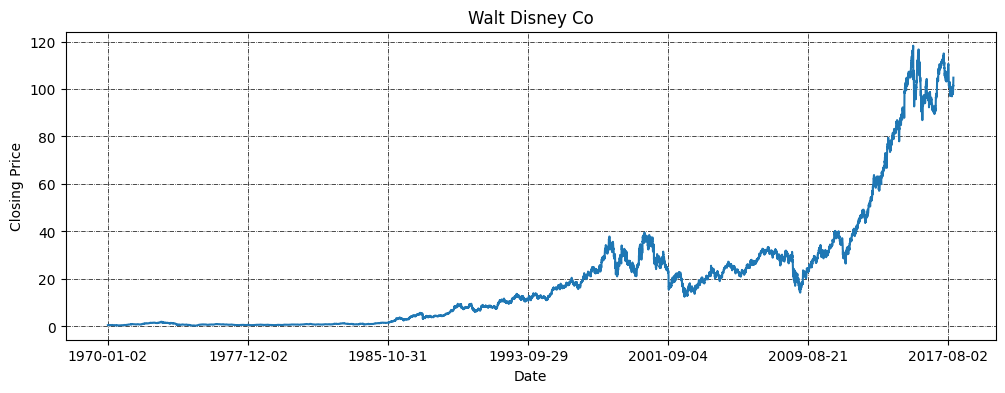

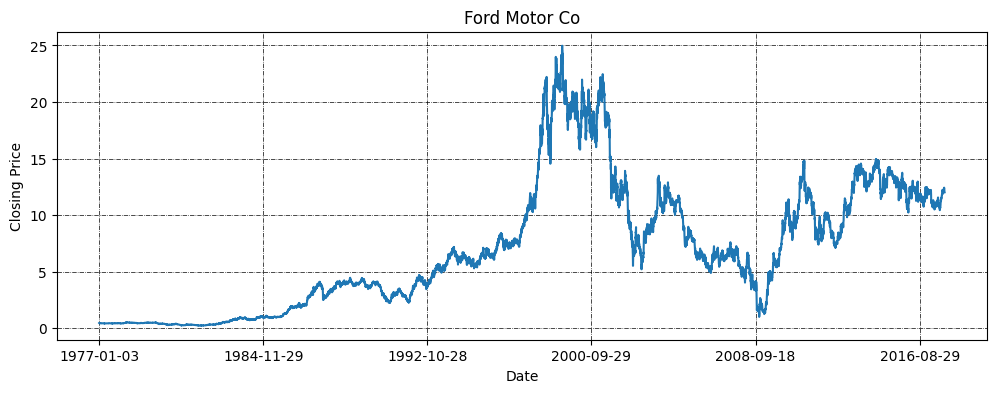

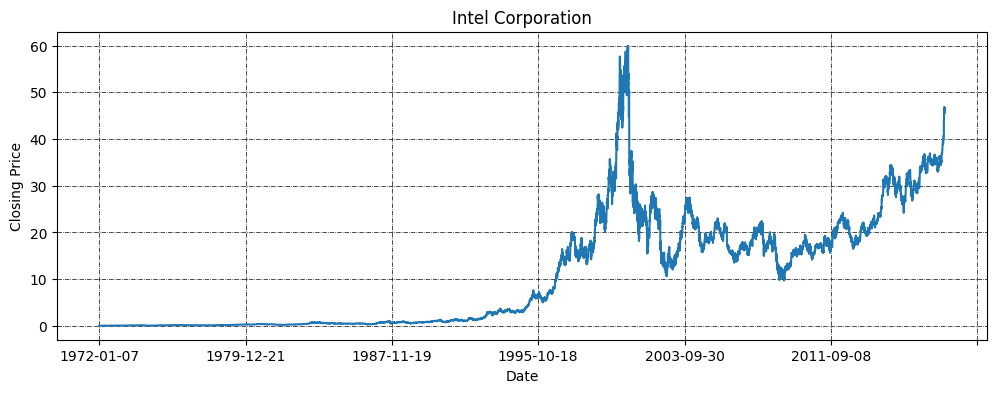

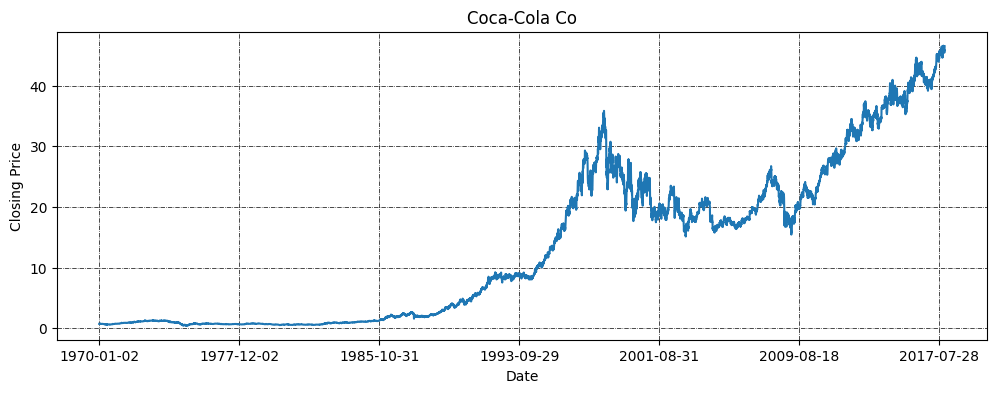

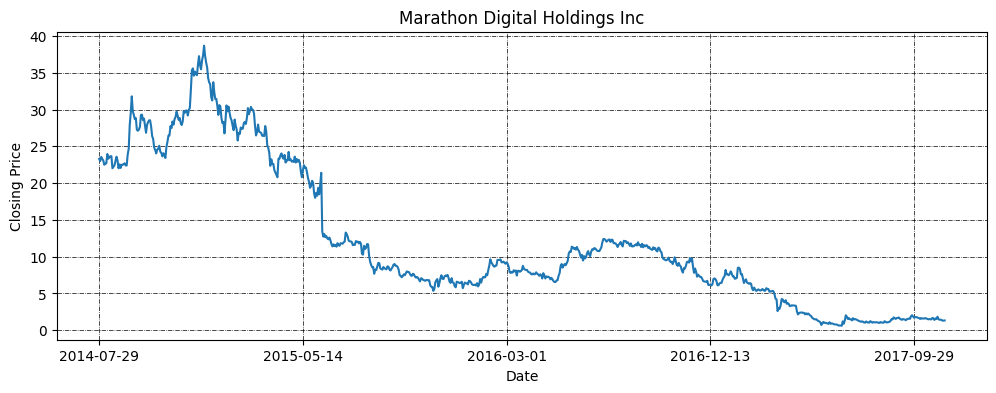

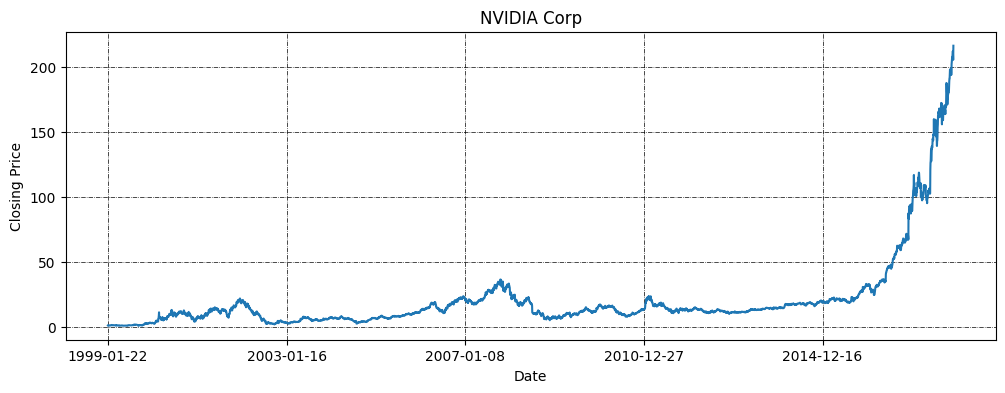

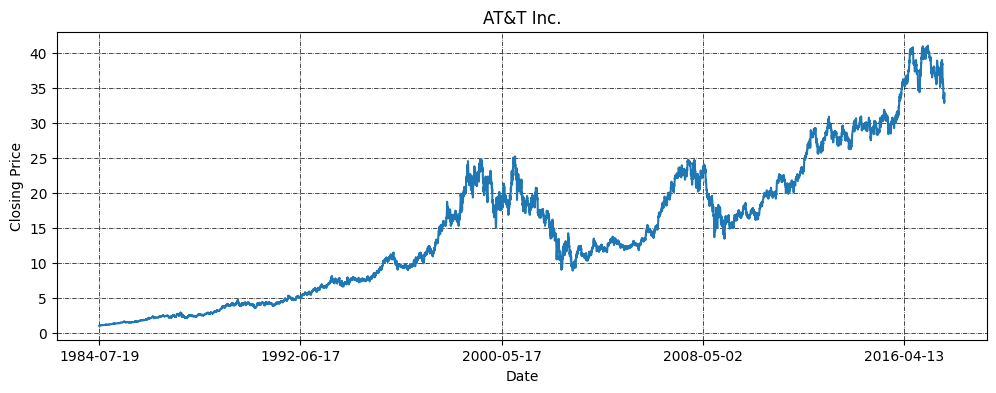

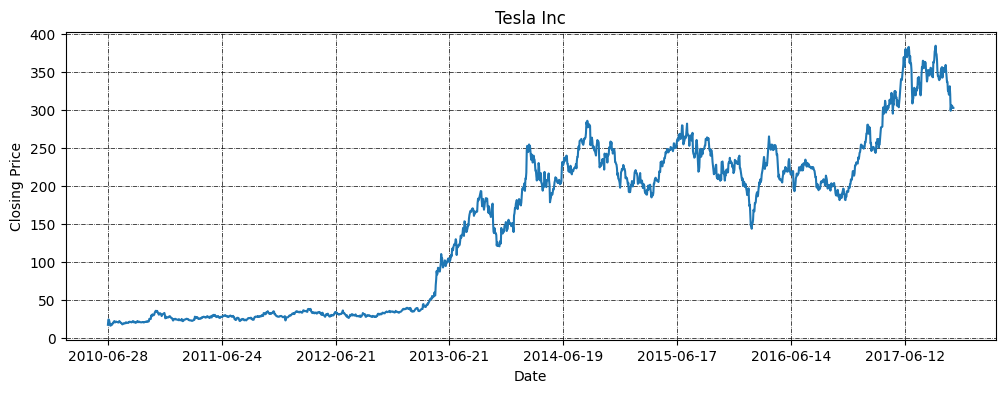

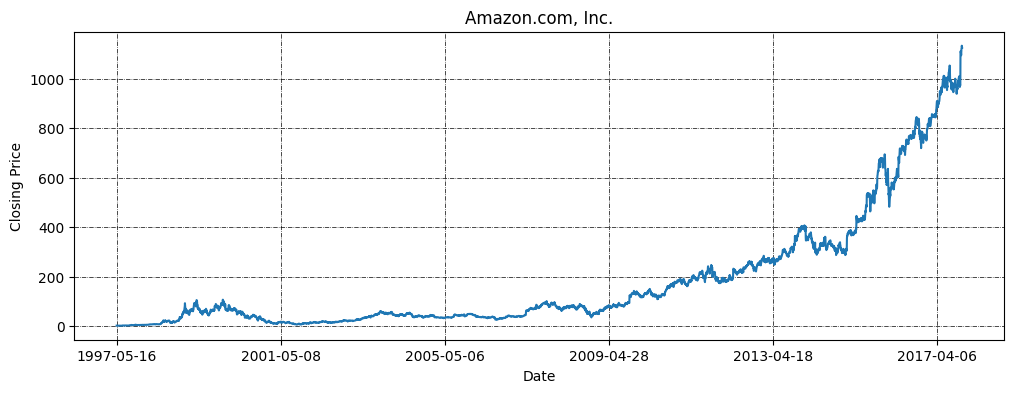

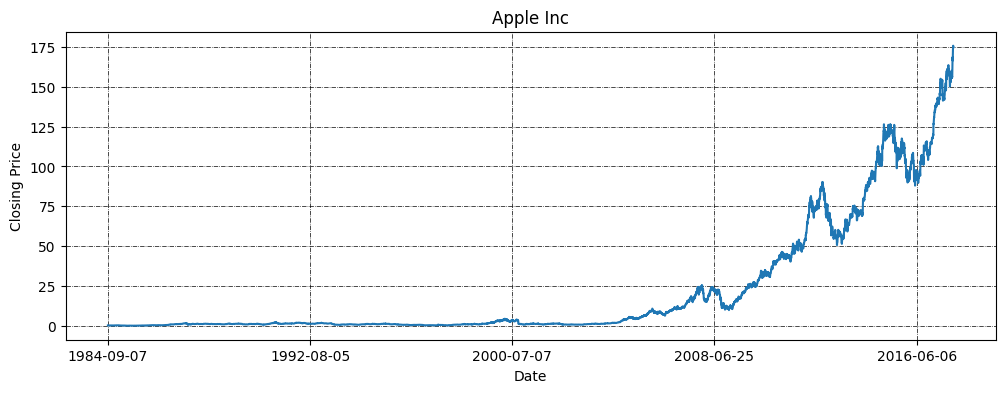

In [18]:
# plot the closing price for each stock
for i, inp in enumerate([inp01, inp02, inp03, inp04, inp05, inp06, inp07, inp08, inp09, inp10]):

    inp['Close'].plot(figsize=(12,4))

    plt.title(dfs[list(dfs.keys())[i]][0])
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(which='major', color='k', linestyle='-.', linewidth=0.5)
    plt.show()

**c. Create a function that loads the closing prices from a data file into numpy arrays that are appropriate for training time sequence models to predict a price two days into the future, using a lookback value of your choice.**

In [21]:
# create a function to load closing price for each stock
def get_lookback(inp, look_back, predict_forward):
    y_lb = pd.DataFrame(inp)
    X_lb = [y_lb.shift(i) for i in range(predict_forward, look_back+predict_forward)]
    X_lb = pd.concat(X_lb, axis=1)
    X_lb.fillna(0, inplace = True)
    return X_lb.values, y_lb.values

In [22]:
# setup the lookback and predict forward
look_back = 10
predict_forward = 2

**Discussion**

We decided to use a lookback period of 10 days as it is a common choice.

**d. Use the function created in the previous step to load all of the data files into 2d numpy arrays.**

In [19]:
# extract the values of the closing price for each stock
ts_data_inp01 = inp01['Close'].values.reshape(-1,1)
ts_data_inp02 = inp02['Close'].values.reshape(-1,1)
ts_data_inp03 = inp03['Close'].values.reshape(-1,1)
ts_data_inp04 = inp04['Close'].values.reshape(-1,1)
ts_data_inp05 = inp05['Close'].values.reshape(-1,1)
ts_data_inp06 = inp06['Close'].values.reshape(-1,1)
ts_data_inp07 = inp07['Close'].values.reshape(-1,1)
ts_data_inp08 = inp08['Close'].values.reshape(-1,1)
ts_data_inp09 = inp09['Close'].values.reshape(-1,1)
ts_data_inp10 = inp10['Close'].values.reshape(-1,1)

In [24]:
# dataframes = [inp01, inp02, inp03, inp04, inp05, inp06, inp07, inp08, inp09, inp10]

# ts_data_list = []

# for inp in dataframes:
#     X, y = get_lookback(inp['Close'], look_back, predict_forward)
#     ts_data_list.append(X)


[array([[  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [  0.5204,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       ...,
       [100.64  ,  98.64  ,  98.35  , ...,  98.56  ,  97.8   ,  98.29  ],
       [101.61  , 100.64  ,  98.64  , ...,  98.31  ,  98.56  ,  97.8   ],
       [101.18  , 101.61  , 100.64  , ...,  98.04  ,  98.31  ,  98.56  ]]), array([[ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.     ],
       [ 0.44917,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.     ],
       ...,
       [12.33   , 12.36   , 12.42   , ..., 12.27   , 12.04   , 12.19   ],
       [12.16   , 12.33   , 12.36   , ..., 12.06   , 12.27   , 12.04   ],
       [12.06   , 12.16   , 12.33   , ..., 12.1    , 12.06   , 12.27   ]]), array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.

In [25]:
# scale the data
scaler = MinMaxScaler()

# first input we will use .fit_transform
inp01_scaled = scaler.fit_transform(inp01.Close.values.reshape(-1,1))

# the rest we will use .transform
inp02_scaled = scaler.transform(inp02.Close.values.reshape(-1,1))
inp03_scaled = scaler.transform(inp03.Close.values.reshape(-1,1))
inp04_scaled = scaler.transform(inp04.Close.values.reshape(-1,1))
inp05_scaled = scaler.transform(inp05.Close.values.reshape(-1,1))
inp06_scaled = scaler.transform(inp06.Close.values.reshape(-1,1))
inp07_scaled = scaler.transform(inp07.Close.values.reshape(-1,1))
inp08_scaled = scaler.transform(inp08.Close.values.reshape(-1,1))
inp09_scaled = scaler.transform(inp09.Close.values.reshape(-1,1))
inp10_scaled = scaler.transform(inp10.Close.values.reshape(-1,1))

In [ ]:
# scaler = MinMaxScaler()
# scaled_data_list = []

# for inp in dataframes:
#     scaled_data = scaler.fit_transform(inp['Close'].values.reshape(-1, 1))
#     scaled_data_list.append(scaled_data)



In [26]:
# demonstrate inp01_scaled on lookback
X_, y_ = get_lookback(inp01_scaled, look_back, predict_forward)

In [27]:
# check the output
X_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00201277, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.85079311, 0.83383778, 0.83137926, ..., 0.83315957, 0.82671654,
        0.8308706 ],
       [0.85901645, 0.85079311, 0.83383778, ..., 0.83104015, 0.83315957,
        0.82671654],
       [0.85537105, 0.85901645, 0.85079311, ..., 0.82875118, 0.83104015,
        0.83315957]])

In [29]:
print(X_.shape)


(12072, 10)


In [28]:
# check the output
y_

array([[0.00201277],
       [0.00201277],
       [0.00193392],
       ...,
       [0.85537105],
       [0.86808755],
       [0.88589064]])

In [30]:
# create a function to scale the data and load the data
def prep_data(X, y, list, look_back, predict_forward):
    for i, inp in enumerate(list):
        dataX, datay = get_lookback(inp, look_back, predict_forward)
        # append the data
        X = np.append(X, dataX, axis=0)
        y = np.append(y, datay, axis=0)
    # print the shape
    print(f'shape: {X.shape}, {y.shape}')
    return X, y

In [31]:
# train data

# setup the training data list
train_list = [inp01_scaled, inp02_scaled, inp03_scaled, inp04_scaled, inp05_scaled, inp06_scaled]

# train data
X_train = np.empty((0, look_back))
y_train = np.empty((0, 1))

X_train, y_train = prep_data(X_train, y_train, train_list, look_back=look_back, predict_forward=predict_forward)

shape: (51572, 10), (51572, 1)


In [32]:
# validation data

# setup the validation data list
val_list = [inp07_scaled, inp08_scaled]

# validation data
X_val = np.empty((0, look_back))
y_val = np.empty((0, 1))

X_val, y_val = prep_data(X_val, y_val, val_list, look_back=look_back, predict_forward=predict_forward)

shape: (10259, 10), (10259, 1)


In [33]:
# test data

# setup the training, validation and testing data list
test_list = [inp09_scaled, inp10_scaled]

# test data
X_test = np.empty((0, look_back))
y_test = np.empty((0, 1))

X_test, y_test = prep_data(X_test, y_test, test_list, look_back=look_back, predict_forward=predict_forward)

shape: (13517, 10), (13517, 1)


# Modeling

In [38]:
# DICT IS A RESERVATE PYTHON WORD(CHANGE)
# create a function to calculate the training loss
def get_train_loss(history, results_dict, key):
    # get the training loss
    loss_train = history.history['loss'][-1]
    # append to the model results
    results_dict[key] = {'train_loss': loss_train}
    # print the training loss
    print(f'Training loss ({key}): {loss_train:.6f}')


In [39]:
# create a function to get the validation loss
def get_val_loss(X_val, y_val, model, results_dict, key):
    # get the validation loss
    loss_val = model.evaluate(X_val, y_val, verbose=0)
    # append to the model results
    results_dict[key]['val_loss'] = loss_val
    # print the validation loss
    print(f'Validation loss ({key}): {loss_val:.6f}')


In [40]:
# create a function to get the test loss
def get_test_loss(X_test, y_test, model, results_dict, key):
    # get the test loss
    loss_test = model.evaluate(X_test, y_test, verbose=0)
    # append to the model results
    results_dict[key]['test_loss'] = loss_test
    # print the test loss
    print(f'Test loss ({key}): {loss_test:.6f}')


In [41]:
# create a function to plot actual vs predicted values for the validation data
def avp_plot_val(list, y_pred):
    # get the predictions
    testPredict = scaler.inverse_transform(y_pred)

    # split the predictions and put to list
    testPredict_list = [testPredict[:len(list[0])], testPredict[len(list[0]):]]

    # setup the model name
    stock_name = ['t', 'tsla']

    # plot the actual vs predicted values
    for i, ts_data_inp  in enumerate([ts_data_inp07, ts_data_inp08]):

        # construct the predicted plot
        pred_test_plot = ts_data_inp.copy()
        pred_test_plot[:look_back, :] = np.nan
        pred_test_plot[look_back:, :] = testPredict_list[i][look_back:]

        fig, ax = plt.subplots(figsize=(12,4))

        plt.plot(ts_data_inp)
        plt.plot(pred_test_plot, "--")
        ax.set_xlabel('Actual')
        ax.set_ylabel('Predicted')
        ax.set_title(f'Actual vs Predicted of {stock_name[i]} using Validation Data')

        plt.show()

In [42]:
# create a function to plot actual vs predicted values for the test data
def avp_plot_test(list, y_pred):
    # get the predictions
    testPredict = scaler.inverse_transform(y_pred)

    # split the predictions and put to list
    testPredict_list = [testPredict[:len(list[0])], testPredict[len(list[0]):]]

    # setup the model name
    stock_name = ['amzn', 'aapl']

    # plot the actual vs predicted values
    for i, ts_data_inp  in enumerate([ts_data_inp09, ts_data_inp10]):

        # construct the predicted plot
        pred_test_plot = ts_data_inp.copy()
        pred_test_plot[:look_back, :] = np.nan
        pred_test_plot[look_back:, :] = testPredict_list[i][look_back:]

        fig, ax = plt.subplots(figsize=(12,4))

        plt.plot(ts_data_inp)
        plt.plot(pred_test_plot, "--")
        ax.set_xlabel('Actual')
        ax.set_ylabel('Predicted')
        ax.set_title(f'Actual vs Predicted of {stock_name[i]} using Test Data')

        plt.show()

In [43]:
# create a dict for the model results
model_results = {}

**a. Create and compile a time sequence model using tf.keras.Sequential. Use at least one Conv1d layer, one SimpleRNN layer, and one Dropout layer. Use mean_squared_error for the loss.**

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Activation, Dropout, Dense, Reshape, Conv1D, MaxPooling1D, Flatten

In [45]:
# instantiate the Sequential model
model_1 = Sequential()

# add the reshape layer
model_1.add(Reshape((look_back,1), input_shape = (look_back,)))
# add the Conv1D layer
model_1.add(Conv1D(32, 3, activation='relu'))
# add the MaxPooling1D layer
model_1.add(MaxPooling1D(2))
# add the SimpleRNN layer
model_1.add(SimpleRNN(32))
# add the Dropout layer
model_1.add(Dropout(0.2))
# add the Dense layer
model_1.add(Dense(1))
# add the Activation layer
model_1.add(Activation('linear'))

# show the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 10, 1)             0         
                                                                 
 conv1d (Conv1D)             (None, 8, 32)             128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 4, 32)             0         
 D)                                                              
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                        

In [46]:
# compile the model
model_1.compile(optimizer='adam', loss='mse')

**b. Train the model on the training data without using a validation split. Calculate and record the training loss.**

In [47]:
# fit the model
history_1 = model_1.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1612/1612 [==============================] - 25s 8ms/step - loss: 5.9205e-04
Epoch 2/10
1612/1612 [==============================] - 15s 10ms/step - loss: 3.4080e-04
Epoch 3/10
1612/1612 [==============================] - 13s 8ms/step - loss: 3.2996e-04
Epoch 4/10
1612/1612 [==============================] - 13s 8ms/step - loss: 3.4281e-04
Epoch 5/10
1612/1612 [==============================] - 13s 8ms/step - loss: 3.0634e-04
Epoch 6/10
1612/1612 [==============================] - 14s 9ms/step - loss: 3.0640e-04
Epoch 7/10
1612/1612 [==============================] - 14s 8ms/step - loss: 3.2755e-04
Epoch 8/10
1612/1612 [==============================] - 14s 8ms/step - loss: 2.9600e-04
Epoch 9/10
1612/1612 [==============================] - 16s 10ms/step - loss: 2.8898e-04
Epoch 10/10
1612/1612 [==============================] - 15s 9ms/step - loss: 3.0551e-04


In [48]:
# get the training loss
get_train_loss(history_1, model_results, 'model_1')

Training loss (model_1): 0.000306


**c. Use the model to make predictions on the validation data. Calculate and record the validation loss. Create scatter plots of the validation data that show the true price as well as the model predictions.**

In [49]:
# get the validation loss
get_val_loss(X_val, y_val, model_1, model_results, 'model_1')

Validation loss (model_1): 0.003233


In [50]:
# make predictions on the validation data
y_pred_1_val = model_1.predict(X_val)

# append the predictions to the model results
model_results['model_1']['y_pred_val'] = y_pred_1_val

321/321 [==============================] - 1s 3ms/step


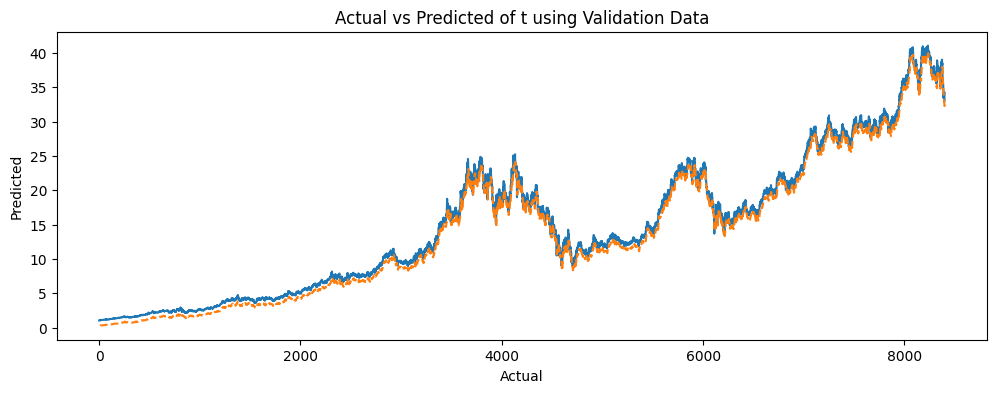

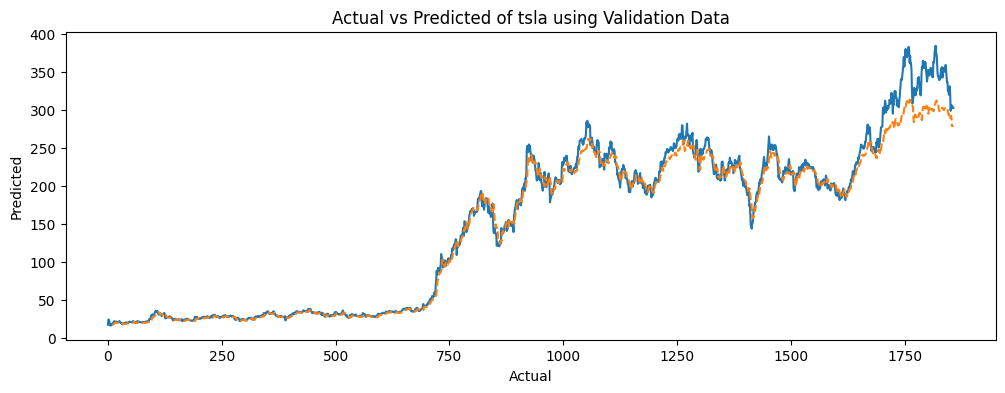

In [51]:
# plot the actual vs predicted values for the validation data
avp_plot_val(val_list, y_pred_1_val)

In [52]:
# make predictions on the test data
y_pred_1_test = model_1.predict(X_test)

# append to the model results
model_results['model_1']['y_pred_test'] = y_pred_1_test

423/423 [==============================] - 1s 3ms/step


In [53]:
# get the test loss
get_test_loss(X_test, y_test, model_1, model_results, 'model_1')

Test loss (model_1): 0.641804


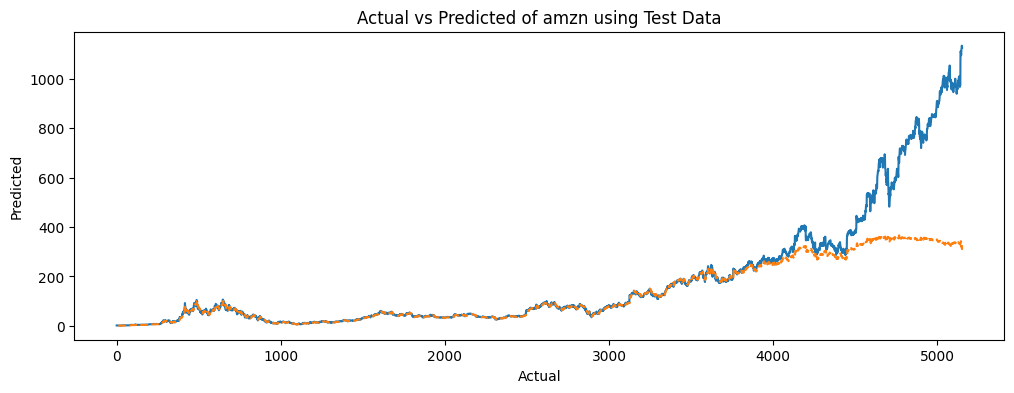

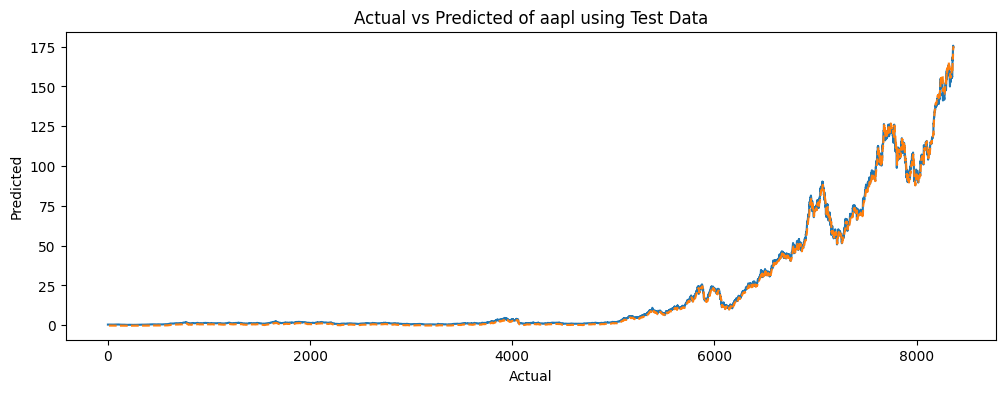

In [54]:
# plot the actual and predicted values of test data
avp_plot_test(test_list, y_pred_1_test)

**d. Revisit the previous steps to make at least three models in total by changing architecture and hyperparameters.**

In [55]:
model_2 = Sequential()
model_2.add(Reshape((look_back, 1), input_shape=(look_back,)))
model_2.add(SimpleRNN(64, return_sequences=True))
model_2.add(SimpleRNN(32))
model_2.add(Dropout(0.3))
model_2.add(Dense(1))
model_2.add(Activation('linear'))


model_2.compile(optimizer='adam', loss='mse')

In [57]:
# fit the model
history_2 = model_2.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1612/1612 [==============================] - 50s 29ms/step - loss: 0.0014
Epoch 2/10
1612/1612 [==============================] - 37s 23ms/step - loss: 6.4463e-04
Epoch 3/10
1612/1612 [==============================] - 33s 21ms/step - loss: 5.6604e-04
Epoch 4/10
1612/1612 [==============================] - 36s 22ms/step - loss: 6.1036e-04
Epoch 5/10
1612/1612 [==============================] - 43s 27ms/step - loss: 5.5434e-04
Epoch 6/10
1612/1612 [==============================] - 53s 33ms/step - loss: 5.5754e-04
Epoch 7/10
1612/1612 [==============================] - 46s 29ms/step - loss: 6.0152e-04
Epoch 8/10
1612/1612 [==============================] - 35s 22ms/step - loss: 5.5222e-04
Epoch 9/10
1612/1612 [==============================] - 36s 22ms/step - loss: 5.2419e-04
Epoch 10/10
1612/1612 [==============================] - 41s 26ms/step - loss: 5.6463e-04


In [58]:
# get the training loss
get_train_loss(history_2, model_results, 'model_2')

Training loss (model_2): 0.000565


In [59]:
# get the val loss
get_val_loss(X_val, y_val, model_2, model_results, 'model_2')

Validation loss (model_2): 0.010503


In [60]:
# make predictions on the validation data for Model 2
y_pred_2_val = model_2.predict(X_val)


321/321 [==============================] - 1s 3ms/step


In [61]:
# append the predictions to the model results for Model 2
model_results['model_2']['y_pred_val'] = y_pred_2_val


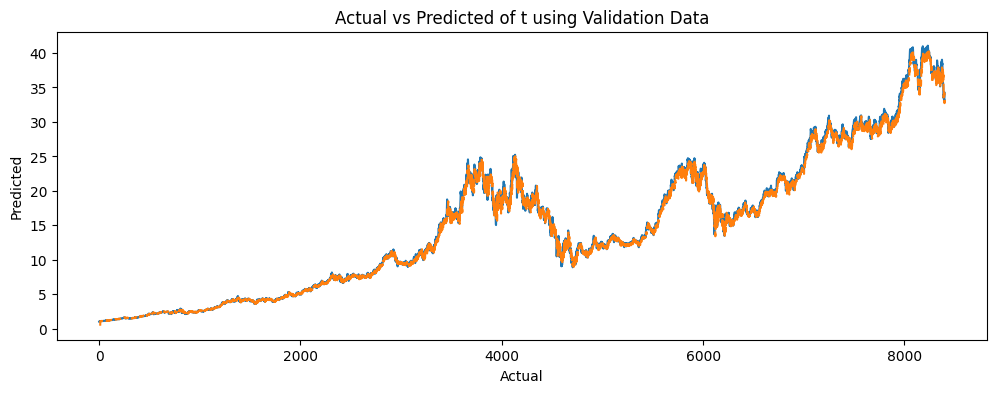

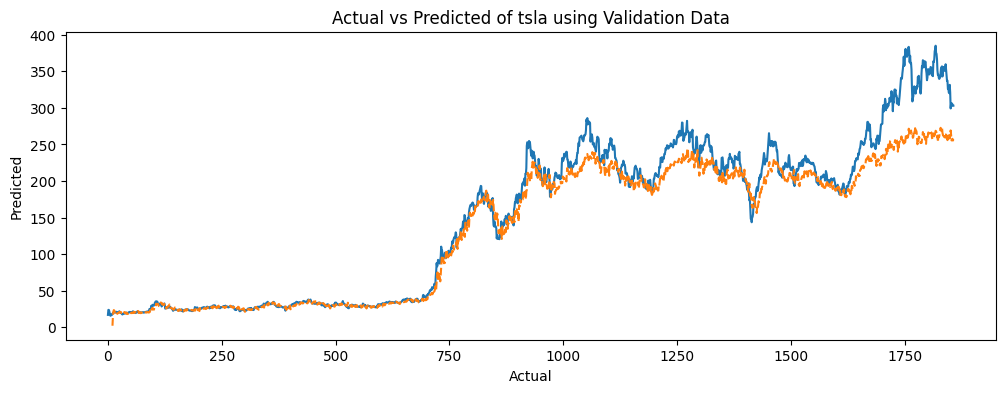

In [62]:
# plot the actual vs predicted values for the validation data for Model 2
avp_plot_val(val_list, y_pred_2_val)

In [63]:
# make predictions on the test data for Model 2
y_pred_2_test = model_2.predict(X_test)


423/423 [==============================] - 1s 3ms/step


In [64]:
# append to the model results for Model 2
model_results['model_2']['y_pred_test'] = y_pred_2_test


In [65]:
# get the test loss for Model 2
get_test_loss(X_test, y_test, model_2, model_results, 'model_2')


Test loss (model_2): 0.780623


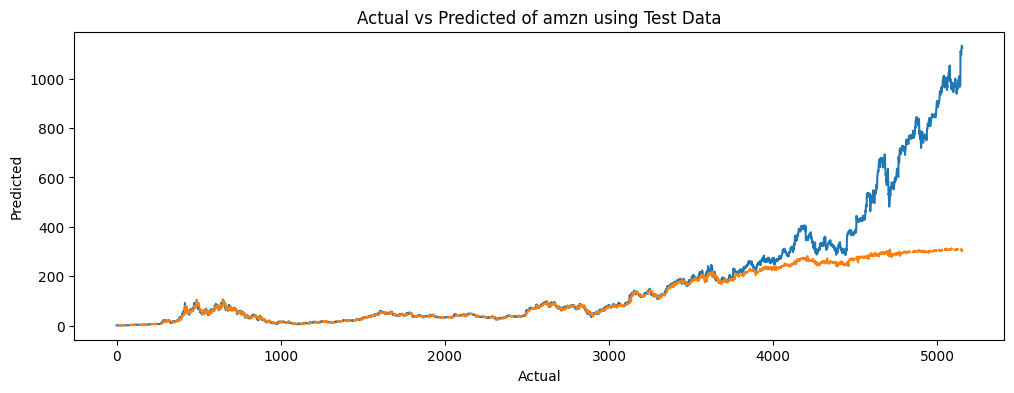

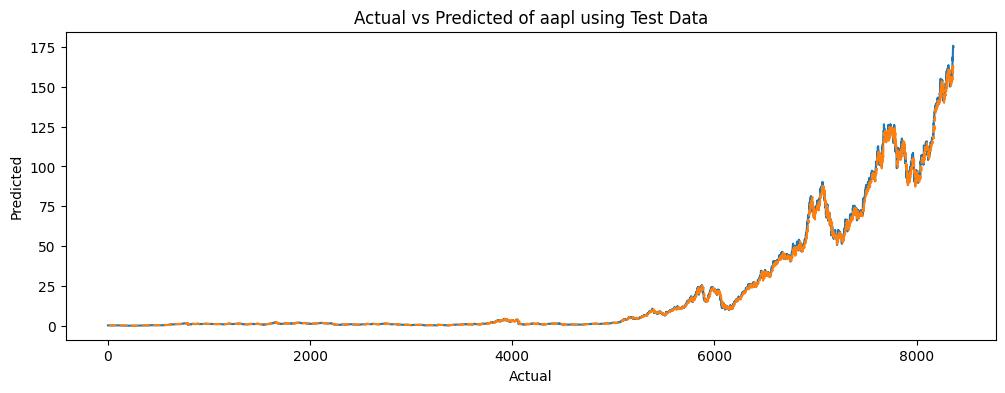

In [66]:
# plot the actual and predicted values of test data for Model 2
avp_plot_test(test_list, y_pred_2_test)

In [67]:
model_3 = Sequential()
model_3.add(Reshape((look_back, 1), input_shape=(look_back,)))
model_3.add(Conv1D(64, 3, activation='relu'))
model_3.add(MaxPooling1D(2))
model_3.add(SimpleRNN(32))
model_3.add(Dropout(0.2))
model_3.add(Dense(1))
model_3.add(Activation('linear'))

model_3.compile(optimizer='adam', loss='mse')

In [69]:
# fit the model
history_3 = model_3.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1612/1612 [==============================] - 17s 9ms/step - loss: 4.7232e-04
Epoch 2/10
1612/1612 [==============================] - 14s 9ms/step - loss: 3.4438e-04
Epoch 3/10
1612/1612 [==============================] - 14s 9ms/step - loss: 3.3271e-04
Epoch 4/10
1612/1612 [==============================] - 14s 9ms/step - loss: 3.5890e-04
Epoch 5/10
1612/1612 [==============================] - 14s 9ms/step - loss: 3.1881e-04
Epoch 6/10
1612/1612 [==============================] - 14s 9ms/step - loss: 3.1626e-04
Epoch 7/10
1612/1612 [==============================] - 16s 10ms/step - loss: 3.3561e-04
Epoch 8/10
1612/1612 [==============================] - 14s 9ms/step - loss: 3.0958e-04
Epoch 9/10
1612/1612 [==============================] - 14s 8ms/step - loss: 3.0752e-04
Epoch 10/10
1612/1612 [==============================] - 13s 8ms/step - loss: 3.1789e-04


In [70]:
# get the training loss for Model 3
get_train_loss(history_3, model_results, 'model_3')


Training loss (model_3): 0.000318


In [71]:
# get the validation loss for Model 3
get_val_loss(X_val, y_val, model_3, model_results, 'model_3')


Validation loss (model_3): 0.006502


In [72]:
# make predictions on the validation data for Model 3
y_pred_3_val = model_3.predict(X_val)

321/321 [==============================] - 1s 2ms/step


In [73]:
# append the predictions to the model results for Model 3
model_results['model_3']['y_pred_val'] = y_pred_3_val

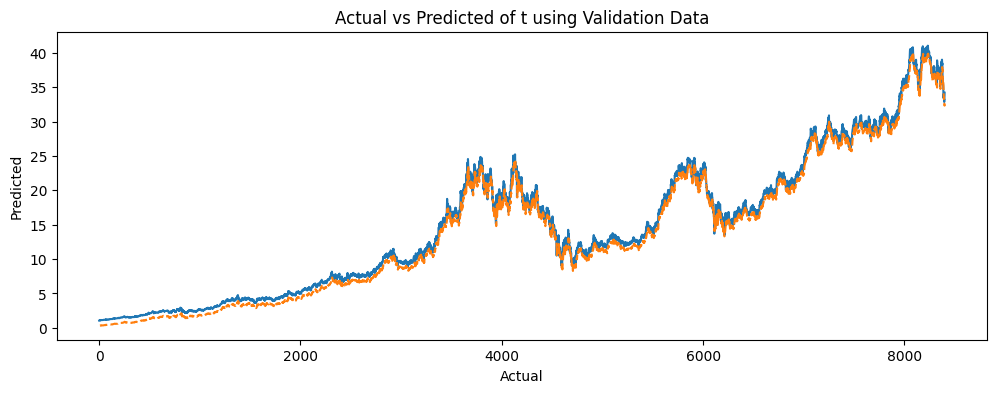

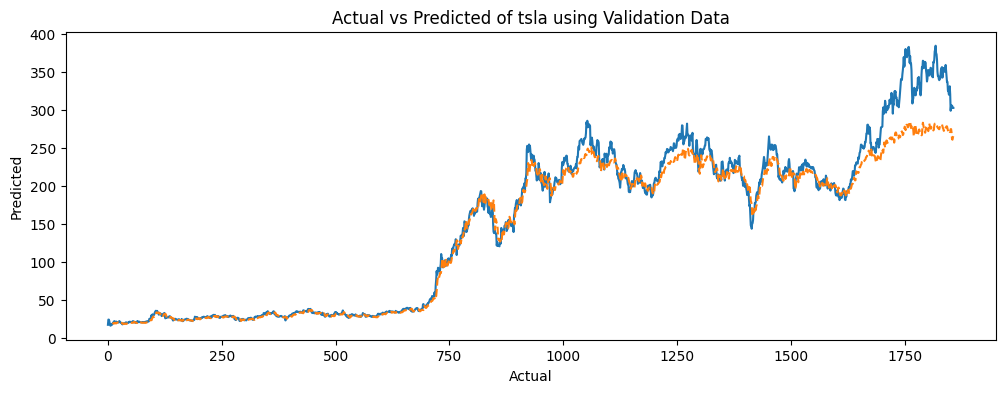

In [74]:
# plot the actual vs predicted values for the validation data for Model 3
avp_plot_val(val_list, y_pred_3_val)

In [75]:
# make predictions on the test data for Model 3
y_pred_3_test = model_3.predict(X_test)

423/423 [==============================] - 1s 2ms/step


In [76]:
# append to the model results for Model 3
model_results['model_3']['y_pred_test'] = y_pred_3_test

In [77]:
# get the test loss for Model 3
get_test_loss(X_test, y_test, model_3, model_results, 'model_3')

Test loss (model_3): 0.846476


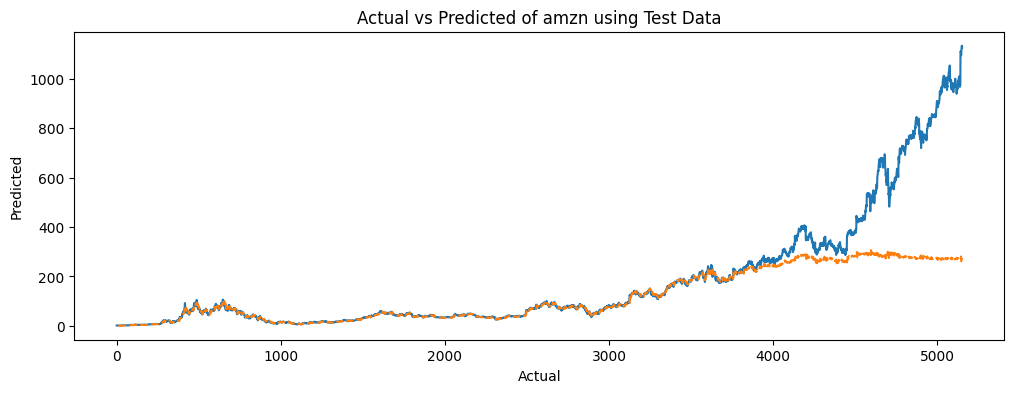

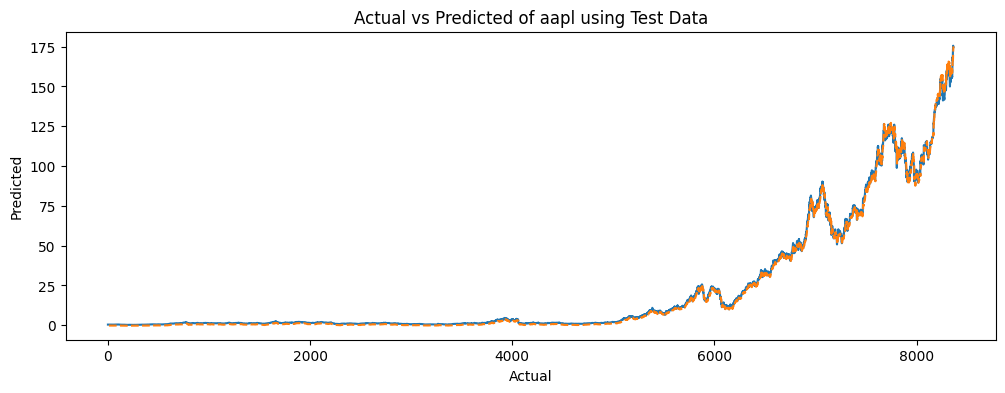

In [78]:
# plot the actual and predicted values of test data for Model 3
avp_plot_test(test_list, y_pred_3_test)

**e. With each model, once you are finished altering hyperparameters, make predictions on the testing data; calculate the testing loss and present a scatter plot of the predictions along with the true values. Present neatly the training, validation, and testing loss along with the scatter plots for each model.**

In [86]:
best_model = None
best_test_loss = float('inf')

for key, value in model_results.items():
    test_loss = value['test_loss']

    if test_loss < best_test_loss:
        best_test_loss = test_loss
        best_model = key

# Print the best model and its test loss
print(f"The best model is {best_model} with a test loss of {best_test_loss}.")


The best model is model_1 with a test loss of 0.6418038010597229.


The best model is model_1 with a test loss of 0.641804.


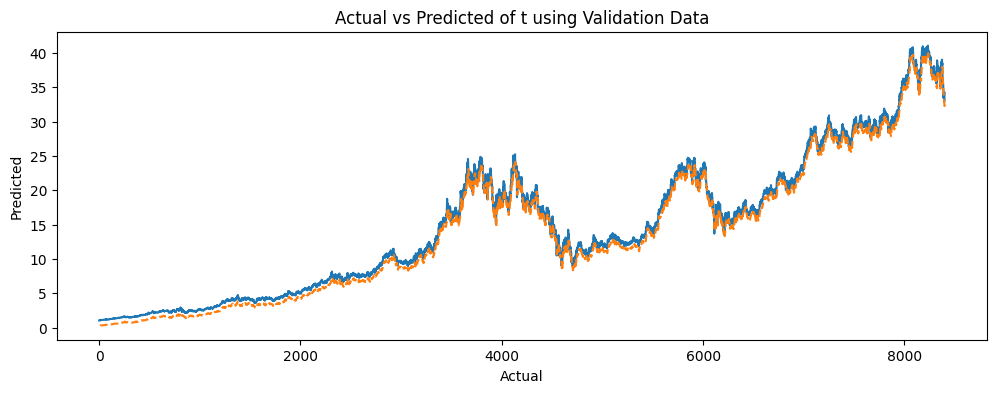

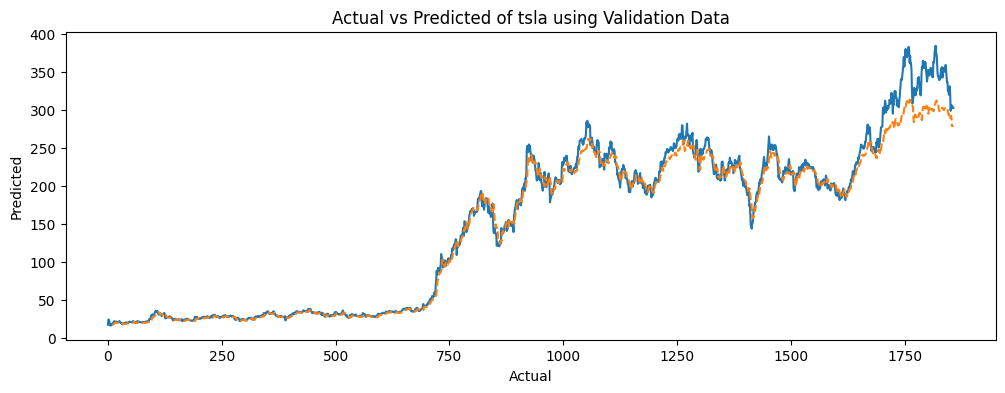

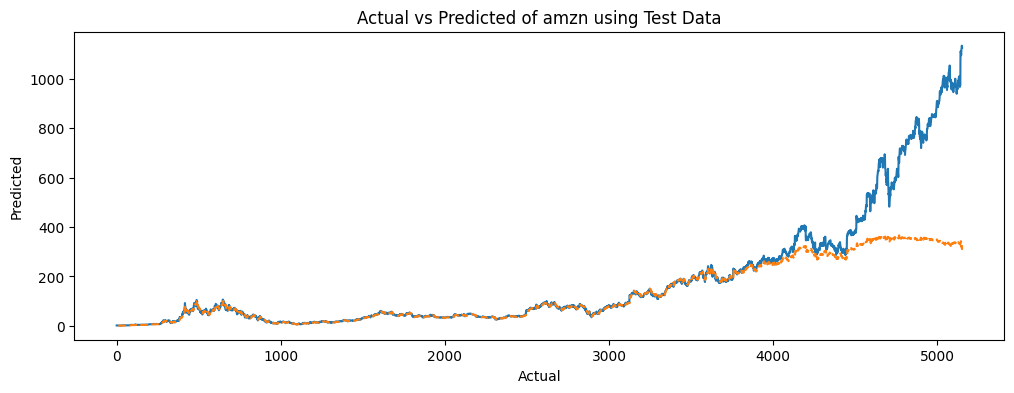

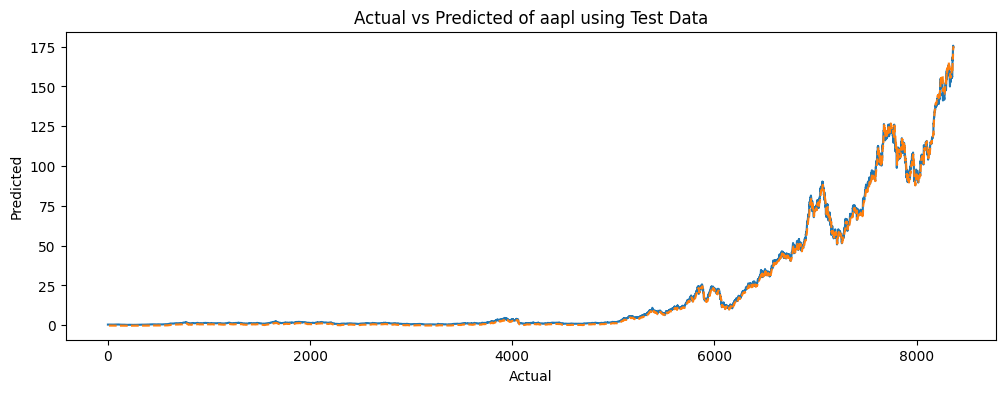

In [87]:
best_model = None
best_test_loss = float('inf')

# Iterate through the models and their results
for key, value in model_results.items():
    test_loss = value['test_loss']

    # Check if the current model has a lower test loss
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        best_model = key

# Print the best model and its test loss
print(f"The best model is {best_model} with a test loss of {best_test_loss:.6f}.")

# Plot the actual vs. predicted values for the best model's validation and test data
avp_plot_val(val_list, model_results[best_model]['y_pred_val'])
avp_plot_test(test_list, model_results[best_model]['y_pred_test'])


# Discussion

**a. Select the best model based on quantitative metrics and plots. Consider zooming-in on problem areas when comparing performance. Justify your selection using markdown.**

In [85]:
# Create a dictionary to store model performance metrics
model_metrics = {}

# Loop through models and calculate their test loss and other relevant metrics
for model_name, model in models.items():
    # Assuming you have already trained and obtained predictions for each model
    y_pred = model.predict(X_test)

    # Calculate the mean squared error (MSE) for the test data
    mse = mean_squared_error(y_test, y_pred)

    # Add the test loss to the model_metrics dictionary
    model_metrics[model_name] = {
        'test_loss': mse,
        'model': model,
        'y_pred': y_pred
    }

# Find the model with the lowest test loss
best_model_name = min(model_metrics, key=lambda k: model_metrics[k]['test_loss'])
best_model = model_metrics[best_model_name]['model']
best_test_loss = model_metrics[best_model_name]['test_loss']

# Print the quantitative metrics
for model_name, metrics in model_metrics.items():
    print(f"{model_name} - Test Loss: {metrics['test_loss']}")

# Justification for Model Selection
print("\nJustification for Model Selection:")
print(f"The best model is {best_model_name} with a test loss of {best_test_loss}.")


NameError: ignored

**b. Use markdown to describe how well you feel your model would work to predict closing stock prices two days into the future. Give a quantitative estimate of the error in the predictions.**